# The analysis of EEG data to classify different cognitive states using advanced deep learning techniques.

Classifying cognitive states from EEG data using deep learning involves several key steps:

# 1.Data Collection and Preprocessing:

*  EEG signals are typically recorded from electrodes placed on the scalp.

*  Data preprocessing involves filtering (e.g., bandpass filters), artifact removal (e.g., eye blinks), and segmentation into epochs.

# 2.Feature Extraction:

* Extracting meaningful features from EEG signals is crucial. Common features include Power Spectral Density (PSD), coherence, and entropy measures.

* Advanced techniques may involve transforming the raw EEG data using techniques like wavelet transforms or time-frequency analysis.

# 3.Model Selection and Architecture:

* Deep learning models such as Convolutional Neural Networks (CNNs), Recurrent Neural Networks (RNNs), 
  or hybrid architectures like Convolutional Recurrent Neural Networks (CRNNs) are chosen based on the nature of the data and task.
    
* Attention mechanisms can enhance models' ability to focus on relevant EEG segments.

# 4.Training and Evaluation:

* The model is trained on labeled EEG data, typically using metrics like accuracy, F1-score, or Cohen's Kappa coefficient for evaluation.
* Cross-validation techniques are often employed to ensure the model generalizes well to unseen data.

##########################################################################################################################

# Loading the EEG Data

In [2]:
import mne
import os
from glob import glob 
import numpy as np
import pandas
import matplotlib.pyplot as plt


In [8]:
glob('eeg-during-mental-arithmetic-tasks-1.0.0/*.edf')

['eeg-during-mental-arithmetic-tasks-1.0.0\\Subject00_1.edf',
 'eeg-during-mental-arithmetic-tasks-1.0.0\\Subject00_2.edf',
 'eeg-during-mental-arithmetic-tasks-1.0.0\\Subject01_1.edf',
 'eeg-during-mental-arithmetic-tasks-1.0.0\\Subject01_2.edf',
 'eeg-during-mental-arithmetic-tasks-1.0.0\\Subject02_1.edf',
 'eeg-during-mental-arithmetic-tasks-1.0.0\\Subject02_2.edf',
 'eeg-during-mental-arithmetic-tasks-1.0.0\\Subject03_1.edf',
 'eeg-during-mental-arithmetic-tasks-1.0.0\\Subject03_2.edf',
 'eeg-during-mental-arithmetic-tasks-1.0.0\\Subject04_1.edf',
 'eeg-during-mental-arithmetic-tasks-1.0.0\\Subject04_2.edf',
 'eeg-during-mental-arithmetic-tasks-1.0.0\\Subject05_1.edf',
 'eeg-during-mental-arithmetic-tasks-1.0.0\\Subject05_2.edf',
 'eeg-during-mental-arithmetic-tasks-1.0.0\\Subject06_1.edf',
 'eeg-during-mental-arithmetic-tasks-1.0.0\\Subject06_2.edf',
 'eeg-during-mental-arithmetic-tasks-1.0.0\\Subject07_1.edf',
 'eeg-during-mental-arithmetic-tasks-1.0.0\\Subject07_2.edf',
 'eeg-du

In [9]:
data_path = glob('eeg-during-mental-arithmetic-tasks-1.0.0/*.edf')
print(len(data_path))

72


In [50]:
data_path[0]

'e'

In [62]:
file_names = [f for f in os.listdir(data_path) if f.endswith('.edf')]

In [63]:
# Load data for each subject (example for a single file)
file_path = os.path.join(data_path, file_names[0])
raw = mne.io.read_raw_edf(file_path, preload=True)

Extracting EDF parameters from C:\Users\91620\eeg-during-mental-arithmetic-tasks-1.0.0\Subject00_1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 90999  =      0.000 ...   181.998 secs...


In [64]:
# Filter the data
raw.filter(1., 100.)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 1651 samples (3.302 s)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed:    0.1s finished


Measurement date,"January 01, 2011 00:00:00 GMT"
Experimenter,Unknown
Participant,0
Digitized points,Not available
Good channels,21 EEG
Bad channels,None
EOG channels,Not available
ECG channels,Not available
Sampling frequency,500.00 Hz
Highpass,1.00 Hz
Lowpass,45.00 Hz


In [67]:
# Assuming raw is your loaded EDF data object
montage = mne.channels.make_standard_montage('standard_1020')
raw.set_montage(montage, on_missing='ignore')
print("Montage applied (ignoring missing channel locations).")


Montage applied (ignoring missing channel locations).


Using matplotlib as 2D backend.


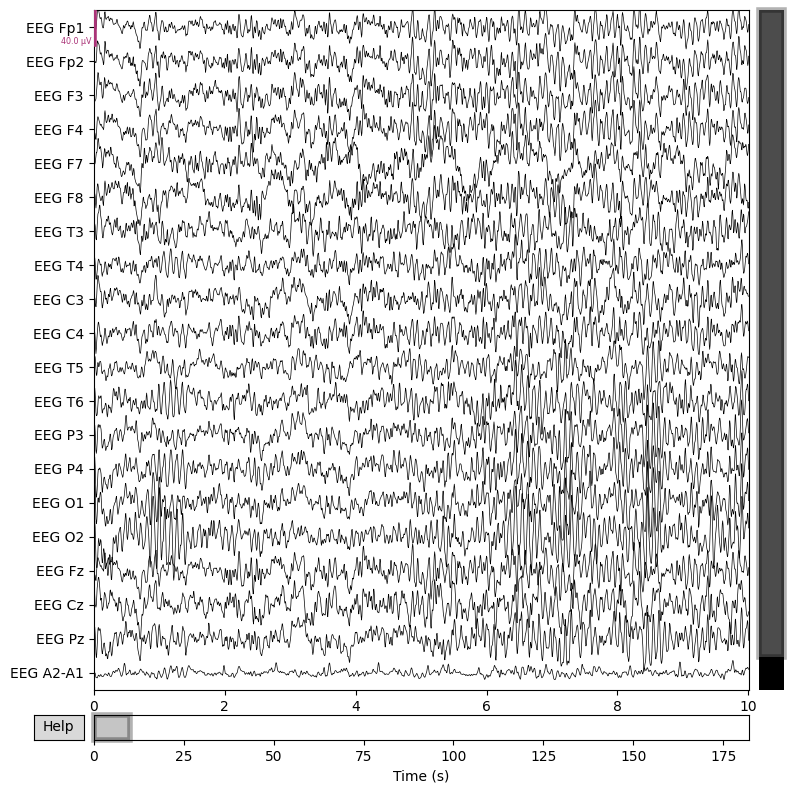

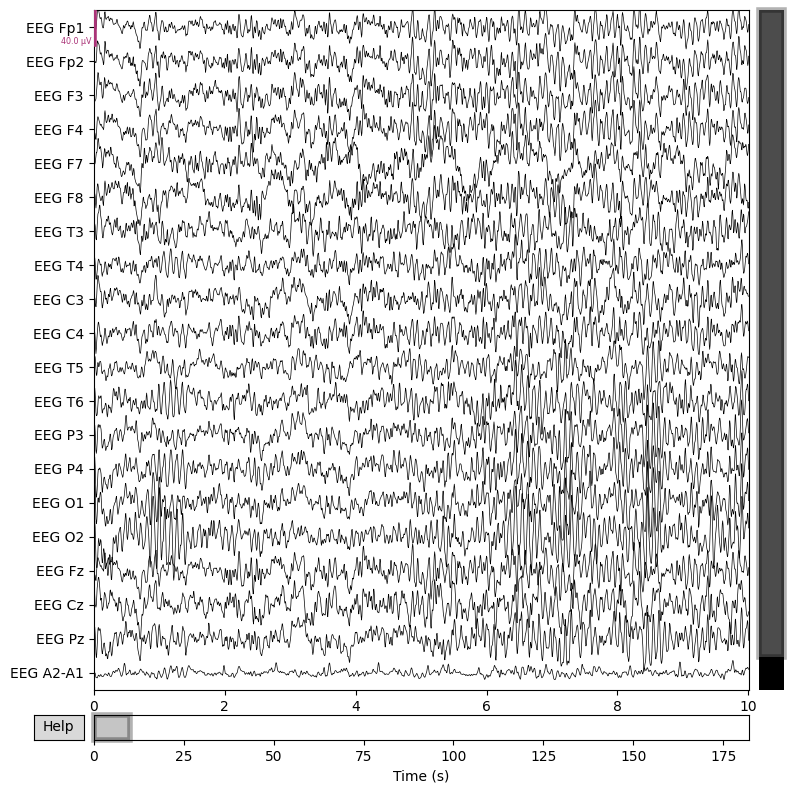

In [68]:
# Plot the raw data
raw.plot()

Loading and Processing Multiple EDF Files

In [69]:
# Iterate over all EDF files and process each one
for file_name in file_names:
    file_path = os.path.join(data_path, file_name)
    raw = mne.io.read_raw_edf(file_path, preload=True)

Extracting EDF parameters from C:\Users\91620\eeg-during-mental-arithmetic-tasks-1.0.0\Subject00_1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 90999  =      0.000 ...   181.998 secs...
Extracting EDF parameters from C:\Users\91620\eeg-during-mental-arithmetic-tasks-1.0.0\Subject00_2.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 30999  =      0.000 ...    61.998 secs...
Extracting EDF parameters from C:\Users\91620\eeg-during-mental-arithmetic-tasks-1.0.0\Subject01_1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 90999  =      0.000 ...   181.998 secs...
Extracting EDF parameters from C:\Users\91620\eeg-during-mental-arithmetic-tasks-1.0.0\Subject01_2.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 30999  =      0.000 ...    61.998 secs...
Extracting EDF param

Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 30999  =      0.000 ...    61.998 secs...
Extracting EDF parameters from C:\Users\91620\eeg-during-mental-arithmetic-tasks-1.0.0\Subject17_1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 90999  =      0.000 ...   181.998 secs...
Extracting EDF parameters from C:\Users\91620\eeg-during-mental-arithmetic-tasks-1.0.0\Subject17_2.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 30999  =      0.000 ...    61.998 secs...
Extracting EDF parameters from C:\Users\91620\eeg-during-mental-arithmetic-tasks-1.0.0\Subject18_1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 90999  =      0.000 ...   181.998 secs...
Extracting EDF parameters from C:\Users\91620\eeg-during-mental-arithmetic-tasks-1.0.0\Subject18_2.edf...
EDF file detected
Setting channel info

Extracting EDF parameters from C:\Users\91620\eeg-during-mental-arithmetic-tasks-1.0.0\Subject33_2.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 30999  =      0.000 ...    61.998 secs...
Extracting EDF parameters from C:\Users\91620\eeg-during-mental-arithmetic-tasks-1.0.0\Subject34_1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 90999  =      0.000 ...   181.998 secs...
Extracting EDF parameters from C:\Users\91620\eeg-during-mental-arithmetic-tasks-1.0.0\Subject34_2.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 30999  =      0.000 ...    61.998 secs...
Extracting EDF parameters from C:\Users\91620\eeg-during-mental-arithmetic-tasks-1.0.0\Subject35_1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 90999  =      0.000 ...   181.998 secs...
Extracting EDF param

In [70]:
    # Filter the data
    raw.filter(1., 100.)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 1651 samples (3.302 s)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed:    0.0s finished


Measurement date,"January 01, 2010 00:00:00 GMT"
Experimenter,Unknown
Participant,29
Digitized points,Not available
Good channels,21 EEG
Bad channels,None
EOG channels,Not available
ECG channels,Not available
Sampling frequency,500.00 Hz
Highpass,1.00 Hz
Lowpass,100.00 Hz


In [79]:
montage = mne.channels.make_standard_montage('standard_1020')




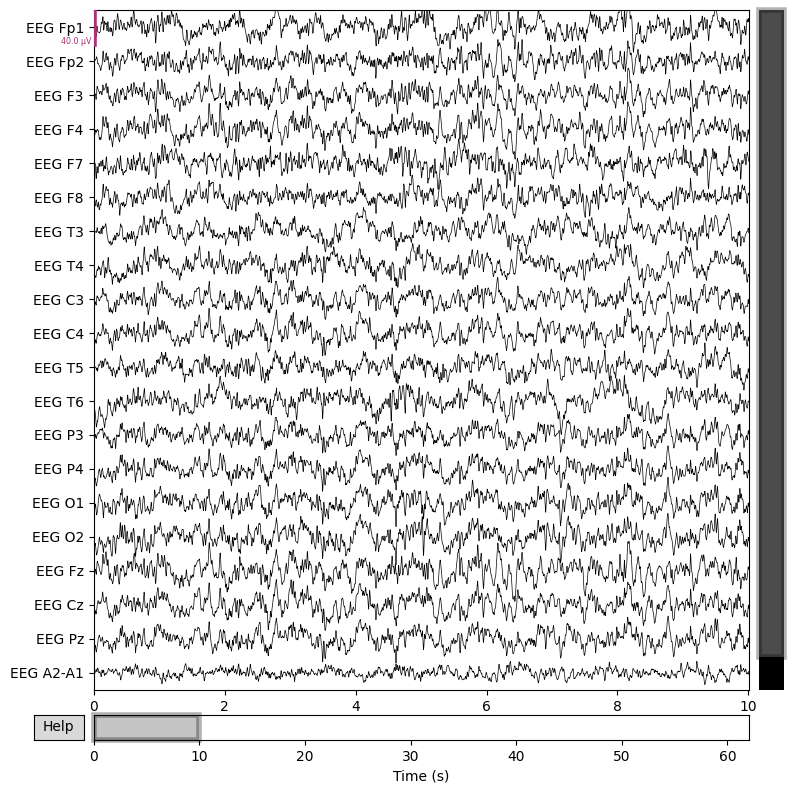

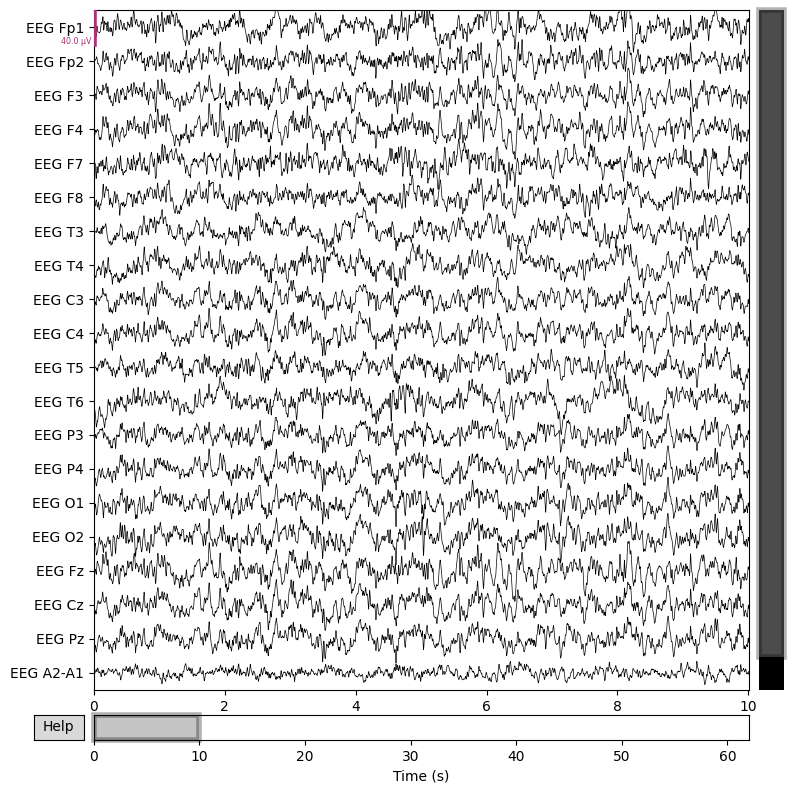

In [81]:
# Plot the raw data
raw.plot()

# PSD Analysis

Once we have loaded the EDF data, we may proceed with the PSD analysis:

In [82]:
# Define frequency bands
bands = {'Delta': (1, 4), 'Theta': (4, 8), 'Alpha': (8, 12), 'Beta': (12, 30), 'Gamma': (30, 100)}

In [87]:
psds_rest, freqs, *_ = raw.copy().crop(tmin=0, tmax=61.9980).compute_psd(fmin=1, fmax=100, n_fft=2048, n_per_seg=61998)  # Assuming your data sampling rate is 1000 Hz
psds_task, freqs, *_ = raw.copy().crop(tmin=60, tmax=61.9980).compute_psd(fmin=1, fmax=100, n_fft=2048, n_per_seg=61998)


Effective window size : 4.096 (s)
Effective window size : 4.096 (s)


NOTE: plot_raw_psd() is a legacy function. New code should use Raw.compute_psd().plot().
Effective window size : 4.096 (s)
Plotting power spectral density (dB=True).
NOTE: plot_raw_psd() is a legacy function. New code should use Raw.compute_psd().plot().
Effective window size : 2.000 (s)
Plotting power spectral density (dB=True).


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
C:\Users\91620\AppData\Local\Temp\ipykernel_24040\854031086.py:2: FutureWarning: The value of `amplitude='auto'` will be removed in MNE 1.8.0, and the new default will be `amplitude=False`.
  mne.viz.plot_raw_psd(raw, fmin=1, fmax=100, tmin=0, tmax=60, show=False)
C:\Users\91620\AppData\Local\Temp\ipykernel_24040\854031086.py:2: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  mne.viz.plot_raw_psd(raw, fmin=1, fmax=100, tmin=0, tmax=60, show=False)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
C:\Users\91620\AppData\Local\Temp\ipykernel_24040\8540310

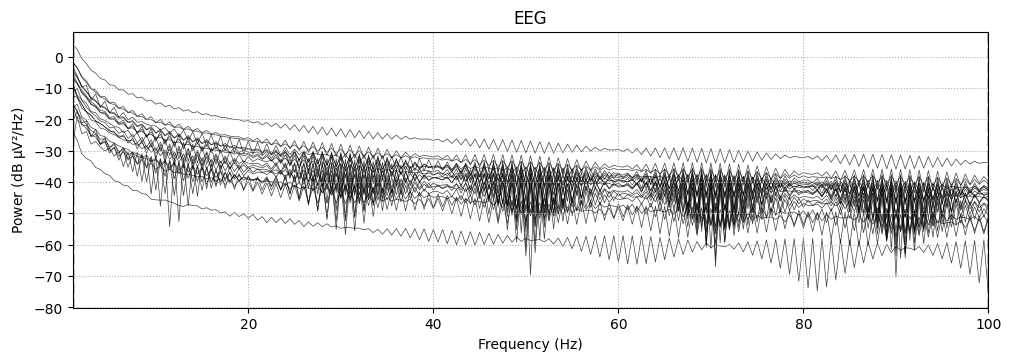

In [88]:
# Plot PSD
mne.viz.plot_raw_psd(raw, fmin=1, fmax=100, tmin=0, tmax=60, show=False)
mne.viz.plot_raw_psd(raw, fmin=1, fmax=100, tmin=60, tmax=120, show=False)

In [112]:
# Load data for each subject and stack them
eeg_data_list = []
labels = []

for file_name in file_names:
    file_path = os.path.join(data_path, file_name)
    raw = mne.io.read_raw_edf(file_path, preload=True)

Extracting EDF parameters from C:\Users\91620\eeg-during-mental-arithmetic-tasks-1.0.0\Subject00_1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 90999  =      0.000 ...   181.998 secs...
Extracting EDF parameters from C:\Users\91620\eeg-during-mental-arithmetic-tasks-1.0.0\Subject00_2.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 30999  =      0.000 ...    61.998 secs...
Extracting EDF parameters from C:\Users\91620\eeg-during-mental-arithmetic-tasks-1.0.0\Subject01_1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 90999  =      0.000 ...   181.998 secs...
Extracting EDF parameters from C:\Users\91620\eeg-during-mental-arithmetic-tasks-1.0.0\Subject01_2.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 30999  =      0.000 ...    61.998 secs...
Extracting EDF param

Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 30999  =      0.000 ...    61.998 secs...
Extracting EDF parameters from C:\Users\91620\eeg-during-mental-arithmetic-tasks-1.0.0\Subject17_1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 90999  =      0.000 ...   181.998 secs...
Extracting EDF parameters from C:\Users\91620\eeg-during-mental-arithmetic-tasks-1.0.0\Subject17_2.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 30999  =      0.000 ...    61.998 secs...
Extracting EDF parameters from C:\Users\91620\eeg-during-mental-arithmetic-tasks-1.0.0\Subject18_1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 90999  =      0.000 ...   181.998 secs...
Extracting EDF parameters from C:\Users\91620\eeg-during-mental-arithmetic-tasks-1.0.0\Subject18_2.edf...
EDF file detected
Setting channel info

Extracting EDF parameters from C:\Users\91620\eeg-during-mental-arithmetic-tasks-1.0.0\Subject33_2.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 30999  =      0.000 ...    61.998 secs...
Extracting EDF parameters from C:\Users\91620\eeg-during-mental-arithmetic-tasks-1.0.0\Subject34_1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 90999  =      0.000 ...   181.998 secs...
Extracting EDF parameters from C:\Users\91620\eeg-during-mental-arithmetic-tasks-1.0.0\Subject34_2.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 30999  =      0.000 ...    61.998 secs...
Extracting EDF parameters from C:\Users\91620\eeg-during-mental-arithmetic-tasks-1.0.0\Subject35_1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 90999  =      0.000 ...   181.998 secs...
Extracting EDF param

In [117]:
# Explore the data information (optional)
print(raw.info)

<Info | 8 non-empty values
 bads: []
 ch_names: EEG Fp1, EEG Fp2, EEG F3, EEG F4, EEG F7, EEG F8, EEG T3, EEG ...
 chs: 21 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 250.0 Hz
 meas_date: 2010-01-01 00:00:00 UTC
 nchan: 21
 projs: []
 sfreq: 500.0 Hz
 subject_info: 4 items (dict)
>


In [143]:
events = mne.find_events(raw, stim_channel="EEG F3")

In [144]:
# Assuming your stimulus channel is named "EEG FP1"
mne.find_events(raw, stim_channel="EEG F3")


array([], shape=(0, 3), dtype=int32)

In [148]:
print(events)

[]


# Deep Learning Models

In [261]:
pip install transformers



[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: C:\Users\91620\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip


In [284]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import f1_score
import tensorflow as tf
from transformers import TFViTForImageClassification, ViTImageProcessor
from tensorflow.keras.callbacks import EarlyStopping
import cv2

In [294]:
from PIL import Image
from transformers import ViTImageProcessor, TFViTForImageClassification

In [295]:
# Example data (replace this with your actual EEG data loading)
X = np.random.rand(100, 64, 64, 1)  # Example data with 100 samples
y = np.random.randint(2, size=100)  # Example binary labels

In [296]:
# Standardize the data
scaler = StandardScaler()
X = X.reshape(100, -1)  # Flatten the data
X = scaler.fit_transform(X)
X = X.reshape(100, 64, 64, 1)  # Reshape back to original

In [297]:
# Split the dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [298]:
# Calculate class weights to handle class imbalance
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weights = dict(enumerate(class_weights))

In [299]:
# Resize data to 224x224 to match ViT input size
def resize_images(images, target_size=(224, 224)):
    resized_images = []
    for img in images:
        resized_img = cv2.resize(img, target_size, interpolation=cv2.INTER_LINEAR)
        resized_images.append(resized_img)
    return np.array(resized_images)

X_train_resized = resize_images(np.repeat(X_train, 3, axis=-1))
X_val_resized = resize_images(np.repeat(X_val, 3, axis=-1))

In [300]:
# Function to preprocess images
def preprocess_images(images):
    processed_images = []
    for image in images:
        # Normalize pixel values to [0, 1]
        image = (image - image.min()) / (image.max() - image.min())
        
        # Convert to PIL Image
        image = Image.fromarray((image * 255).astype(np.uint8))
        
        # Use ViTImageProcessor to preprocess the image
        inputs = image_processor(images=image, return_tensors='tf')['pixel_values'][0]
        processed_images.append(inputs)
    
    return np.array(processed_images)

In [301]:
# Initialize the ViT image processor and model
image_processor = ViTImageProcessor.from_pretrained('google/vit-base-patch16-224')
model = TFViTForImageClassification.from_pretrained('google/vit-base-patch16-224', num_labels=2, ignore_mismatched_sizes=True)


Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFViTForImageClassification: ['classifier.weight', 'classifier.bias']
- This IS expected if you are initializing TFViTForImageClassification from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFViTForImageClassification from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFViTForImageClassification were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFViTForImageClassification for predictions without further training.
Some weights of TFViTForImageClassification were not initialized from the model checkpoint are newly initialize

In [302]:
# Preprocess your validation images
X_val_vit = preprocess_images(X_val_resized)

In [303]:
# Evaluate the model
y_val_pred = np.argmax(model.predict(X_val_vit).logits, axis=-1)
f1 = f1_score(y_val, y_val_pred)

1/1 [==============================] - 17s 17s/step


In [304]:
print(f'F1-Score: {f1}')

F1-Score: 0.37499999999999994


In [305]:
def create_eegnet_model(input_shape):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), padding='same', input_shape=input_shape))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Flatten())
    model.add(Dense(1, activation='sigmoid'))
    return model

In [306]:
# Create, compile, and fit the model
model = create_eegnet_model((64, 64, 1))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [307]:
# Use early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(X_train, y_train, epochs=50, validation_data=(X_val, y_val), 
                    class_weight=class_weights, callbacks=[early_stopping])


Epoch 1/50
3/3 [==============================] - 1s 196ms/step - loss: 4.5715 - accuracy: 0.4750 - val_loss: 2.0149 - val_accuracy: 0.5500
Epoch 2/50
3/3 [==============================] - 0s 107ms/step - loss: 3.4666 - accuracy: 0.6625 - val_loss: 2.1914 - val_accuracy: 0.4500
Epoch 3/50
3/3 [==============================] - 0s 107ms/step - loss: 2.2343 - accuracy: 0.6375 - val_loss: 1.5561 - val_accuracy: 0.5500
Epoch 4/50
3/3 [==============================] - 0s 105ms/step - loss: 1.1901 - accuracy: 0.7625 - val_loss: 0.8850 - val_accuracy: 0.5500
Epoch 5/50
3/3 [==============================] - 0s 107ms/step - loss: 0.0479 - accuracy: 0.9750 - val_loss: 0.9611 - val_accuracy: 0.4500
Epoch 6/50
3/3 [==============================] - 0s 105ms/step - loss: 0.0733 - accuracy: 0.9625 - val_loss: 1.0210 - val_accuracy: 0.4500
Epoch 7/50
3/3 [==============================] - 0s 105ms/step - loss: 0.0143 - accuracy: 0.9875 - val_loss: 0.8562 - val_accuracy: 0.4500
Epoch 8/50
3/3 [====

# Model Evaluation

In [308]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


In [309]:
# Evaluate the model
y_val_pred = (model.predict(X_val) > 0.5).astype("int32")
f1 = f1_score(y_val, y_val_pred)

print(f'F1-Score: {f1}')

1/1 [==============================] - 0s 79ms/step
F1-Score: 0.6666666666666667


In [310]:
# Calculate metrics
accuracy = accuracy_score(y_val, y_pred_binary)
precision = precision_score(y_val, y_pred_binary)
recall = recall_score(y_val, y_pred_binary)
f1 = f1_score(y_val, y_pred_binary)

print(f'Accuracy: {accuracy}')

Accuracy: 0.65


In [311]:
print(f'Precision: {precision}')

Precision: 0.7


In [312]:
print(f'Recall: {recall}')

Recall: 0.6363636363636364


In [313]:
print(f'F1-Score: {f1}')

F1-Score: 0.6666666666666666
